# Exploratory Data Analysis

In [35]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline 
from collections import Counter
from wordcloud import WordCloud

import itertools


In [8]:
df = pd.read_csv('train_clean.csv')

# drop the instances where the keywords are missing
df = df[df.keyword.notnull()]
df = df[df.text.notnull()]

In [81]:
def analyse(disastrous=1):
    """Analyse the full, cleaned data set"""
    data = df
    all_text = data[data['target']==disastrous]["text"].str.split(" ")

    all_words = []
    for _, row in data.iterrows():
        text = row["text"]
        if pd.notnull(text) and row["target"] == disastrous:
            all_words.extend(text.split(" "))

    counter = Counter(all_words)
    most_common = counter.most_common()
    word_freq = {}
    for word, number in most_common:
        word_freq[word] = number
#         print(f"{number}x {word}")
    return " ".join([(k + " ")*v for k,v in word_freq.items()])


In [82]:
text = analyse()
text_non_disaster = analyse(disastrous=0)

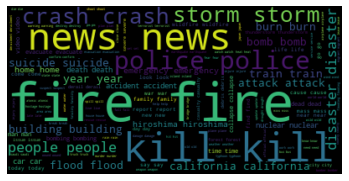

In [87]:
# Generate a word cloud image
wordcloud0 = WordCloud().generate(text)

plt.imshow(wordcloud0, cmap='spring', interpolation='bilinear')
# plt.title = 'Most occurring disastrous words.'
plt.axis("off")
plt.show()

image = wordcloud0.to_image()
image.show()

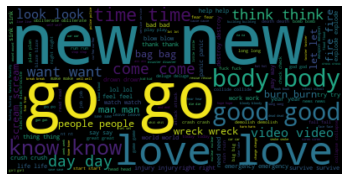

In [84]:
wordcloud = WordCloud().generate(text_non_disaster)
plt.imshow(wordcloud, cmap='spring', interpolation='bilinear')
# plt.title = 'Most occurring disastrous words.'
plt.axis("off")
plt.show()

image = wordcloud.to_image()
image.show()